In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

from tqdm import tqdm

import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

2024-01-04 12:11:41.076567: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-04 12:11:41.081031: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 12:11:41.107133: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 12:11:41.107170: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 12:11:41.107919: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

# Quadratic Equation Aanalysis with Neural Networks

Neural Networks are a great way to analyze mathematical solutions, they provide a shorthand to classical analytical methods and eventually analytical methods to classically hard problems. Now We are starting with a simple system, which is to analyze the Quadratic Equation. 

## Real vs Complex Solutions:

We will start with trainting a neural network to classify whether the equation would have a real or complex solution. For that we will gather a lot of data by hand and then train a neural network over that. 

Consider a quadratic equation given by 
\begin{align}
ax^2 + bx + c = 0
\end{align}

These $a$ and $b$ are called the _cofficients_ of the equations. Two numbers (real or complex) are called _roots_ of the polynomial if they satisfy the equation.

There is a simple rule to determine whether the equation will have real or complex solutions. That is:

$$D = b^2 - 4ac$$

then if $D\ge0$ then the equation will have __Real__ solutions if $D<0$ then the equation will have complex solutions. 

### Making the Neural Network:

To train an NN we will do following steps:
 
- Make the data
- Preprocess the data
- Make the neural network
- Compile the network
- Train the network
- Predict the values

#### Step1: Make the Data

To make the data we take the rabdom coffs. Not that $a>0$, then we did the the compuation for $D$ for every combination and create the labels for them.

In [2]:
N = 30000 #total length of the training set

train_samples = np.zeros((N, 3))
train_label = np.zeros(N)

train_samples[:,0] = np.random.randint(1,6,size=N)
train_samples[:,1] = np.random.randint(-10,10,size=N)
train_samples[:,2] = np.random.randint(-10,10,size=N)

#setting the label according to the condition
#0 means real solution, 1 means complex solution,

for i in range(N):
    a, b, c = train_samples[i]
    
    D = b**2 - 4*a*c
    if D>=0:
        train_label[i] = 0
    else:
        train_label[i] = 1

#### Step 2: Preprocessing the data

Now we need to preprocess the data in such a way that it works the best way with the neural network. The first thing we need to do that, we need to scale the samples from $(-10,10)$ to $(0,1)$.

In [3]:
train_samples,train_label = shuffle(train_samples, train_label)

scaler = MinMaxScaler(feature_range=(0,1))
train_samples_rescaled = scaler.fit_transform(train_samples)

#### Step 3: Making a neural network

We will make a four layer Neural Network with the coffs as input. 

- The input shape is (3,1)
- The output shape of 2 being `real` and `complex`

In [4]:
model = Sequential()
model.add(Dense(16,input_shape=(3,),activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='softmax'))

#### Step 4: Compiling the network

In [5]:
train_label_2 = np.zeros((N,2))
train_label_2[:,0] = [1 if i==0 else 0 for i in train_label]
train_label_2[:,1] = [1 if i==1 else 0 for i in train_label]

In [6]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

#### Step 5: Training the network

In [7]:
model.fit(x=train_samples_rescaled, y=train_label_2,batch_size=10,shuffle=True,epochs=30,verbose=2)

Epoch 1/30
3000/3000 - 3s - loss: 0.4917 - accuracy: 0.7658 - 3s/epoch - 868us/step
Epoch 2/30
3000/3000 - 2s - loss: 0.2766 - accuracy: 0.8869 - 2s/epoch - 719us/step
Epoch 3/30
3000/3000 - 2s - loss: 0.2134 - accuracy: 0.9081 - 2s/epoch - 673us/step
Epoch 4/30
3000/3000 - 2s - loss: 0.1829 - accuracy: 0.9249 - 2s/epoch - 571us/step
Epoch 5/30
3000/3000 - 2s - loss: 0.1599 - accuracy: 0.9393 - 2s/epoch - 563us/step
Epoch 6/30
3000/3000 - 2s - loss: 0.1416 - accuracy: 0.9507 - 2s/epoch - 560us/step
Epoch 7/30
3000/3000 - 2s - loss: 0.1266 - accuracy: 0.9583 - 2s/epoch - 560us/step
Epoch 8/30
3000/3000 - 2s - loss: 0.1144 - accuracy: 0.9641 - 2s/epoch - 558us/step
Epoch 9/30
3000/3000 - 2s - loss: 0.1045 - accuracy: 0.9675 - 2s/epoch - 559us/step
Epoch 10/30
3000/3000 - 2s - loss: 0.0964 - accuracy: 0.9701 - 2s/epoch - 556us/step
Epoch 11/30
3000/3000 - 2s - loss: 0.0894 - accuracy: 0.9719 - 2s/epoch - 560us/step
Epoch 12/30
3000/3000 - 2s - loss: 0.0831 - accuracy: 0.9740 - 2s/epoch - 

In [8]:
model.fit(x=train_samples_rescaled, y=train_label_2,batch_size=10,validation_split=0.3,shuffle=True,epochs=30,verbose=2)

Epoch 1/30
2100/2100 - 2s - loss: 0.0303 - accuracy: 0.9950 - val_loss: 0.0310 - val_accuracy: 0.9948 - 2s/epoch - 851us/step
Epoch 2/30
2100/2100 - 2s - loss: 0.0294 - accuracy: 0.9953 - val_loss: 0.0304 - val_accuracy: 0.9948 - 2s/epoch - 804us/step
Epoch 3/30
2100/2100 - 2s - loss: 0.0288 - accuracy: 0.9954 - val_loss: 0.0296 - val_accuracy: 0.9948 - 2s/epoch - 812us/step
Epoch 4/30
2100/2100 - 2s - loss: 0.0279 - accuracy: 0.9954 - val_loss: 0.0293 - val_accuracy: 0.9946 - 2s/epoch - 804us/step
Epoch 5/30
2100/2100 - 2s - loss: 0.0273 - accuracy: 0.9955 - val_loss: 0.0288 - val_accuracy: 0.9940 - 2s/epoch - 803us/step
Epoch 6/30
2100/2100 - 2s - loss: 0.0267 - accuracy: 0.9960 - val_loss: 0.0278 - val_accuracy: 0.9933 - 2s/epoch - 818us/step
Epoch 7/30
2100/2100 - 2s - loss: 0.0259 - accuracy: 0.9958 - val_loss: 0.0278 - val_accuracy: 0.9937 - 2s/epoch - 800us/step
Epoch 8/30
2100/2100 - 2s - loss: 0.0252 - accuracy: 0.9963 - val_loss: 0.0266 - val_accuracy: 0.9950 - 2s/epoch - 806

#### Step 5: Predicting the network by values

Prepare the data as same as the training

#### Is that fine:

Yeah I know the results look pretty good when looked from above but does that really work? Let's test with some basic equations:

- square root of two $x^2-2=0$: $a=1, b=0, c=-2$, real
- Equation for golden ratio: $x^2 -x -1 = 0$, real
- Cube roots of unity: $x^2 + x+ 1 = 0$, complex

In [9]:
N = 1#total length of the training set

def guess_roots(a,b,c):

    test_sample = np.zeros((N, 3))
    test_label = np.zeros(N)

    test_sample[:,0] = a
    test_sample[:,1] = b
    test_sample[:,2] = c

    print(test_sample)

    predictions = model.predict(x=test_sample,verbose=0)
    predictions_arg = np.argmax(predictions, axis=-1)

    if predictions_arg[0] == 0:
        print("The roots are real")
    else:
        print("The roots are complex")
        
        
guess_roots(1,0,-2) #roots of two
guess_roots(1,0,1) #iota
guess_roots(1,1,1) #cube roots of unity
guess_roots(1,-1,-1)#golden ratio

[[ 1.  0. -2.]]
The roots are real
[[1. 0. 1.]]
The roots are complex
[[1. 1. 1.]]
The roots are complex
[[ 1. -1. -1.]]
The roots are real


# Predicting the roots with Neural Networks

We would now want to predict the solutions. We will still prepare the date with the same way. Now we would need to handle the complex and real roots saperately. For real roots, $D>0$. Now with that we will get two roots as:

$$x_1 = \frac{-b + \sqrt D}{2a}, \quad x_2 = \frac{-b - \sqrt D}{2a}$$

With complex roots, the imaginary part would not be mixed with the real part so the two solutions would be:

$$x_3 = -\frac{b}{2a} + \iota \frac{\sqrt D}{2a}, \quad x_4 = -\frac{b}{2a} - \iota \frac{\sqrt D}{2a}$$

The idea is to calculate these two parts saperately:

$x_0 = \frac{-b}{2a}$
$x_1 = \frac{\sqrt{|D|}}{2a}$

and based on above neural net. If the equation has real equations then the roots are $x_0\pm x_1$ and if the equation has imaginary roots then the roots are: $x_0 + \iota x_1$


In [25]:
batch_size = 3000
total_batches = 20000


def f(x):
        a = 1
        b = x[0]
        c = x[1]
        
        D = b**2 - 4*a*c
        
        #real and img part of the solution
        return -b/(2*a), np.sqrt(abs(D))/2*a

def matke_batches():
    
    #making free space to store date
    train_samples = np.zeros((batch_size,2))
    train_label = np.zeros((batch_size,2))
    
    #the cofficient b, and c are random 
    train_samples[:,0] = np.random.randint(-10,10,size=batch_size)
    train_samples[:,1] = np.random.randint(-10,10,size=batch_size)

    
    for i in range(batch_size):
        train_label[i] = f(train_samples[i])
        
    train_samples,train_label = shuffle(train_samples, train_label)

#     scaler = MinMaxScaler(feature_range=(0,1))
#     train_samples = scaler.fit_transform(train_samples)
    
    return train_samples, train_label

In [26]:
model2 = Sequential()

model2.add(Dense(32,input_shape=(2,),activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(2,activation='linear'))

In [27]:
model2.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')

In [28]:
costs = []
plt.style.use('seaborn-v0_8-whitegrid')
for i in tqdm(range(total_batches)):
    train_sample, train_label = matke_batches()
    cost = model2.train_on_batch(x=train_sample,y=train_label)
    costs.append(cost)

100%|████████████████████████████████████| 20000/20000 [03:17<00:00, 101.36it/s]


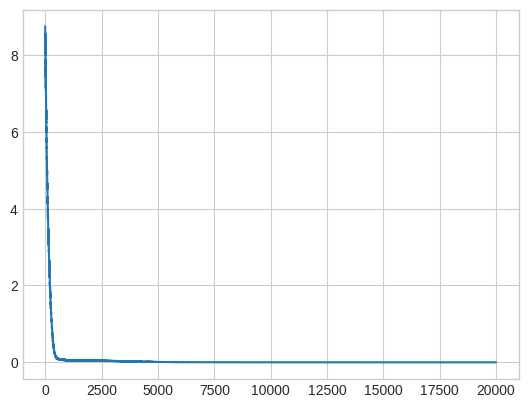

In [29]:
plt.plot(costs)

In [30]:
print(cost)

0.0003303667181171477


In [31]:
train_samples, train_label = matke_batches()
model2.fit(x=train_samples, y=train_label,batch_size=10,validation_split=0.2,shuffle=True,epochs=30,verbose=0)

In [44]:
def guess_roots(a,b,c):
    
    test_samples = np.zeros((1,3))
    test_samples[:,0] = a
    test_samples[:,1] = b
    test_samples[:,2] = c
    
    
    real_or_complex = np.argmax(model.predict(test_samples))
    
    test_sample = np.zeros((1, 2))
    test_sample[:,0] = b/a
    test_sample[:,1] = c/a
    a = 1
    
    x0, x1 = model2.predict(test_sample)[0].round(3)
    
    if real_or_complex==0:
        root0 = x0 + x1
        root1 = x0 - x1
        
        print("The roots are: ", root0, 'and', root1)
    else:
        
        print(f'the roots are: {x0 + 1j*x1} and {x0 - 1j*x1}')

In [45]:
guess_roots(1, -1, -1)

1/1 [==============================] - 0s 11ms/step
The roots are:  1.581 and -0.633


In [46]:
guess_roots(1,0,-2) #roots of two
guess_roots(1,0,1) #iota
guess_roots(1,1,1) #cube roots of unity
guess_roots(1,-1,-1)#golden ratio

1/1 [==============================] - 0s 12ms/step
The roots are:  1.415 and -1.415
1/1 [==============================] - 0s 12ms/step
the roots are: (0.0020000000949949026+0.996999979019165j) and (0.0020000000949949026-0.996999979019165j)
1/1 [==============================] - 0s 13ms/step
the roots are: (-0.5070000290870667+0.8629999756813049j) and (-0.5070000290870667-0.8629999756813049j)
1/1 [==============================] - 0s 12ms/step
The roots are:  1.581 and -0.633
